# Multiple Linear Regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset 

In [2]:
dataset = pd.read_csv("car_price_prediction.csv")

In [3]:
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Update the Missing Values

In [5]:
dataset.drop(dataset.columns[[0,2]], axis=1, inplace=True)
dataset.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
dataset.isnull().sum()

Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## Histogram of Car Price

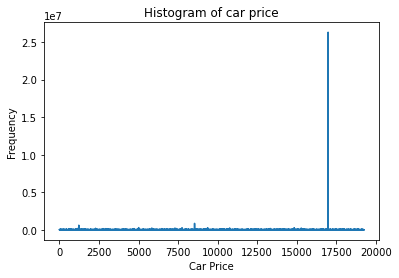

In [34]:
plt.plot(dataset['Price'])
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.title("Histogram of car price")
plt.show()

## Split the dataset into independent and Dependent variables

In [7]:
dataset.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [8]:
X = dataset[['Model', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags']]
y = dataset[['Price']]

## Handling Categorical Variables

In [9]:
X = pd.get_dummies(dataset[['Model', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags']],drop_first = True)

In [10]:
X.head()

,Prod. year,Cylinders,Airbags,Model_100,Model_100 NX,Model_1000,Model_1111,Model_114,Model_116,Model_118,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,2010,6.0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2011,6.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006,4.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# EXPERIMENT #1 

## Splitting the dataset into the Training set, Test set and validation set

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.8, 
                                                 random_state = 42)

In [53]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,
                                                 test_size = 0.1, 
                                                 random_state = 42)

## Training the Multiple Linear Regression model on the Training set

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Intercept and Coefficient

In [45]:
print("Coefficients", regressor.coef_)
print("Intercept", regressor.intercept_)

Coefficients [[  1920.00747049   4240.7060551     542.8611541  ... -11322.56835938
  -25416.578125    -2363.70556641]]
Intercept [-3901025.53957726]


In [46]:
X_train.columns

Index(['Prod. year', 'Cylinders', 'Airbags', 'Model_100', 'Model_100 NX',
       'Model_1000', 'Model_1111', 'Model_114', 'Model_116', 'Model_118',
       ...
       'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Sky blue',
       'Color_White', 'Color_Yellow'],
      dtype='object', length=9424)

## Validation set

In [47]:
y_predval = regressor.predict(X_val.values)

In [48]:
y_validate = y_val.to_numpy() # converting dataframe to numpy array

In [49]:
np.hstack((y_predval, y_validate)).round()

array([[ 1.11700000e+03,  1.41100000e+03],
       [ 3.03182000e+05,  2.77550000e+04],
       [ 6.83000000e+02,  7.06000000e+02],
       [ 1.01990000e+04,  7.31000000e+03],
       [ 8.31300000e+03,  1.88000000e+02],
       [ 2.51170000e+04,  3.00000000e+01],
       [ 2.97940000e+04,  2.97930000e+04],
       [ 4.80520000e+04,  1.72490000e+04],
       [-1.46900000e+04,  4.70000000e+02],
       [ 3.69740000e+04,  2.02970000e+04],
       [ 2.09610000e+04,  1.00360000e+04],
       [-1.49540000e+04,  2.76540000e+04],
       [ 1.49520000e+04,  1.64650000e+04],
       [ 1.50530000e+04,  1.50630000e+04],
       [ 3.29740000e+04,  2.70650000e+04],
       [-2.69320000e+04,  2.76540000e+04],
       [ 2.41280000e+04,  2.60300000e+04],
       [-1.91330000e+04,  1.72490000e+04],
       [ 1.62000000e+02,  1.25000000e+02],
       [ 1.00019000e+05,  3.84450000e+04],
       [-2.70340000e+04,  7.84000000e+03],
       [-1.41960000e+04,  1.61510000e+04],
       [ 1.14386534e+14,  4.45330000e+04],
       [-5.

## Predicting the Test set results

In [50]:
y_pred = regressor.predict(X_test.values)

## RMSE and R Square

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"r-square: {r2_score(y_test, y_pred): 0.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred): 0.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)): 0.2f}")

r-square: -118653124498392268800.00
MSE:  38120753276016029633112702976.00
RMSE:  195245366849039.53


# EXPERIMENT #2 

## Splitting the dataset into the Training set, Test set and validation set

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.7, 
                                                 random_state = 42)

In [31]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,
                                                 test_size = 0.15, 
                                                 random_state = 42)

## Training the Multiple Linear Regression model on the Training set

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Intercept and Coefficient

In [35]:
print("Coefficients", regressor.coef_)
print("Intercept", regressor.intercept_)

Coefficients [[ 1014.31807425    83.16756681   -26.61547461 ... -7604.36328125
  -3734.3125     -5056.68579102]]
Intercept [2.34697314e+12]


In [36]:
X_train.columns

Index(['Prod. year', 'Cylinders', 'Airbags', 'Model_100', 'Model_100 NX',
       'Model_1000', 'Model_1111', 'Model_114', 'Model_116', 'Model_118',
       ...
       'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Sky blue',
       'Color_White', 'Color_Yellow'],
      dtype='object', length=9424)

## Validation set

In [37]:
y_predval = regressor.predict(X_val.values)

In [38]:
y_validate = y_val.to_numpy() # converting dataframe to numpy array

In [39]:
np.hstack((y_predval, y_validate)).round()

array([[1.49000000e+02, 2.82000000e+02],
       [4.96000000e+02, 3.92000000e+02],
       [7.86660000e+04, 4.86100000e+04],
       ...,
       [9.50729114e+10, 5.64500000e+03],
       [1.05130000e+04, 3.45000000e+03],
       [2.65520000e+04, 1.56810000e+04]])

## Predicting the Test set results

In [40]:
y_pred = regressor.predict(X_test.values)

## RMSE and R Square

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"r-square: {r2_score(y_test, y_pred): 0.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred): 0.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)): 0.2f}")

r-square: -5734582635791783.00
MSE:  348711870764657908314537984.00
RMSE:  18673828497784.21
